In [24]:
import os
import numpy as np
import pandas as pd


In [25]:
dirname1 = "dataset/CoREMOF2019-mofdb-version-dc8a0295db/"
dirname2 = "dataset/Anion-pillared_MOFdataset/Database/"


nb_atoms = np.zeros(len(os.listdir(dirname1))+ len(os.listdir(dirname2)))
nb_atoms_noH = np.zeros(len(os.listdir(dirname1))+ len(os.listdir(dirname2)))
i=0

for files in os.listdir(dirname1):
    if not files.endswith("cif"):
        continue
    with open(dirname1+files, "r") as f:
        
        num_lines = sum(1 for _ in f)
        nb_atoms[i] = num_lines - 25
        #if(num_lines-25 < 20):
        #    print(files, num_lines-25)
                    
        f.seek(0)
        num_lines2 = sum(1 for l in f if "H" not in l)
        nb_atoms_noH[i] = num_lines2 - 24
        #if(num_lines2-24 < 20):
        #    print(files, num_lines2-24)
        i+=1
        if(i%100==0):
            print(i, "  elements")

for files in os.listdir(dirname2):
    if not files.endswith("cif"):
        continue
    with open(dirname2+files, "r") as f:
        num_lines = sum(1 for _ in f)
        nb_atoms[i] = num_lines - 30

        f.seek(0)
        num_lines = sum(1 for l in f if "H" not in l)
        nb_atoms_noH[i] = num_lines - 29
        
        i+=1
        if(i%100==0):
            print(i, "  elements")


100   elements
200   elements
300   elements
400   elements
500   elements
600   elements
700   elements
800   elements
900   elements
1000   elements
1100   elements
1200   elements
1300   elements
1400   elements
1500   elements
1600   elements
1700   elements
1800   elements
1900   elements
2000   elements
2100   elements
2200   elements
2300   elements
2400   elements
2500   elements
2600   elements
2700   elements
2800   elements
2900   elements
3000   elements
3100   elements
3200   elements
3300   elements
3400   elements
3500   elements
3600   elements
3700   elements
3800   elements
3900   elements
4000   elements
4100   elements
4200   elements
4300   elements
4400   elements
4500   elements
4600   elements
4700   elements
4800   elements
4900   elements
5000   elements
5100   elements
5200   elements
5300   elements
5400   elements
5500   elements
5600   elements
5700   elements
5800   elements
5900   elements
6000   elements
6100   elements
6200   elements
6300   elements
6

In [26]:
print(nb_atoms)
print(nb_atoms_noH)

[ 78. 293. 611. ...   0.   0.   0.]
[ 58. 202. 503. ...   0.   0.   0.]


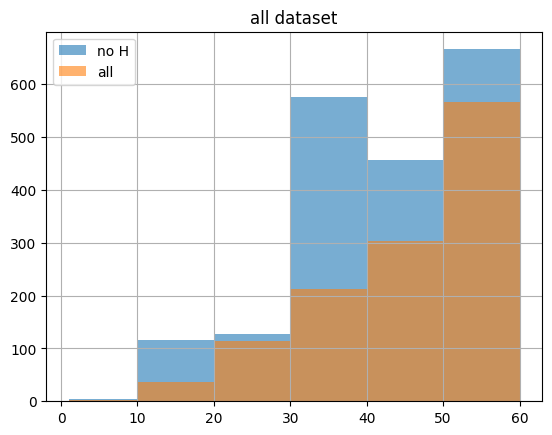

In [27]:
import matplotlib.pyplot as plt
bins=[1,10,20,30,40,50,60]

plt.hist(nb_atoms_noH, bins= bins, alpha = 0.6, label = 'no H')

plt.hist(nb_atoms,bins = bins, alpha = 0.6,label = 'all') 
#plt.yscale('log')
plt.title("all dataset")
plt.legend()
plt.grid()
plt.show()

In [28]:

df = pd.read_csv('MOF-CO2/Co2WithVolumetricAtomTypes.csv')
df = df.dropna()

df = df.drop_duplicates(['MOF'],keep='first')


In [29]:
nb_atoms_dataset = np.zeros(len(df))
nb_atoms_dataset_noH = np.zeros(len(df))

error=0
i=0
for _, row in df.iterrows():
    if(row['MOF']+"_clean.cif" in os.listdir(dirname1)):
        with open(dirname1+row['MOF']+"_clean.cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 25  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 24
            i+=1
    elif(row['MOF']+".cif" in os.listdir(dirname2)):
        with open(dirname2+row['MOF']+".cif", "r") as f:
            num_lines = sum(1 for _ in f)
            nb_atoms_dataset[i] = num_lines - 30  
            f.seek(0)
            num_lines = sum(1 for l in f if "H" not in l)
            nb_atoms_dataset_noH[i] = num_lines - 29
            i+=1
    else:
        error+=1

print("number of errors: ", error, " out of ", len(df))
    #break

number of errors:  121  out of  4243


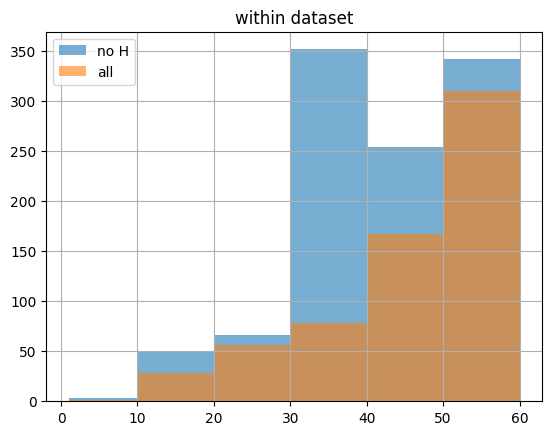

In [30]:
import matplotlib.pyplot as plt
bins=[1,10,20,30,40,50,60]

plt.hist(nb_atoms_dataset_noH, bins= bins, alpha = 0.6, label = 'no H')

plt.hist(nb_atoms_dataset,bins = bins, alpha = 0.6,label = 'all') 
#plt.yscale('log')
plt.title("within dataset")
plt.legend()
plt.grid()
plt.show()